<a href="https://colab.research.google.com/github/SmithTheGreat/Machine-Learning-Projects/blob/main/Long_Short_Term_Memory_for_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
!pip install alpha_vantage pandas
from pandas_datareader import data
import urllib.request, json
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import datetime as dt
import os
import numpy as np

In [ ]:
# data source: Alpha Vantage
api_key = 'OWFUX93O61XVID56'
ticker = "AAL"
urls = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
file= 'stock_market_data-%s.csv'%ticker
if not os.path.exists(file):
  with urllib.request.urlopen(urls) as url :
    data = json.loads(url.read().decode())
    data = data['Time Series (Daily)']
    df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
    for i,j in data.items():
      date = dt.datetime.strptime(i, '%Y-%m-%d')
      data_row = [date.date(), float(j['3. low']),float(j['2. high']),float(j['4. close']),float(j['1. open'])]
      df.loc[-1,:] = data_row
      df.index = df.index +1
  print('Data saved at : %s'%file)
  df.to_csv(file)
else :
  print('File already exists')
  df.to_csv(file)


Data saved at : stock_market_data-AAL.csv


In [ ]:
df = df.sort_values('Date')
df.head()

,Date,Low,High,Close,Open
0,2005-09-27,19.1,21.4,19.3,21.05
1,2005-09-28,19.2,20.53,20.5,19.3
2,2005-09-29,20.1,20.58,20.21,20.4
3,2005-09-30,20.18,21.05,21.01,20.26
4,2005-10-03,20.9,21.75,21.5,20.9


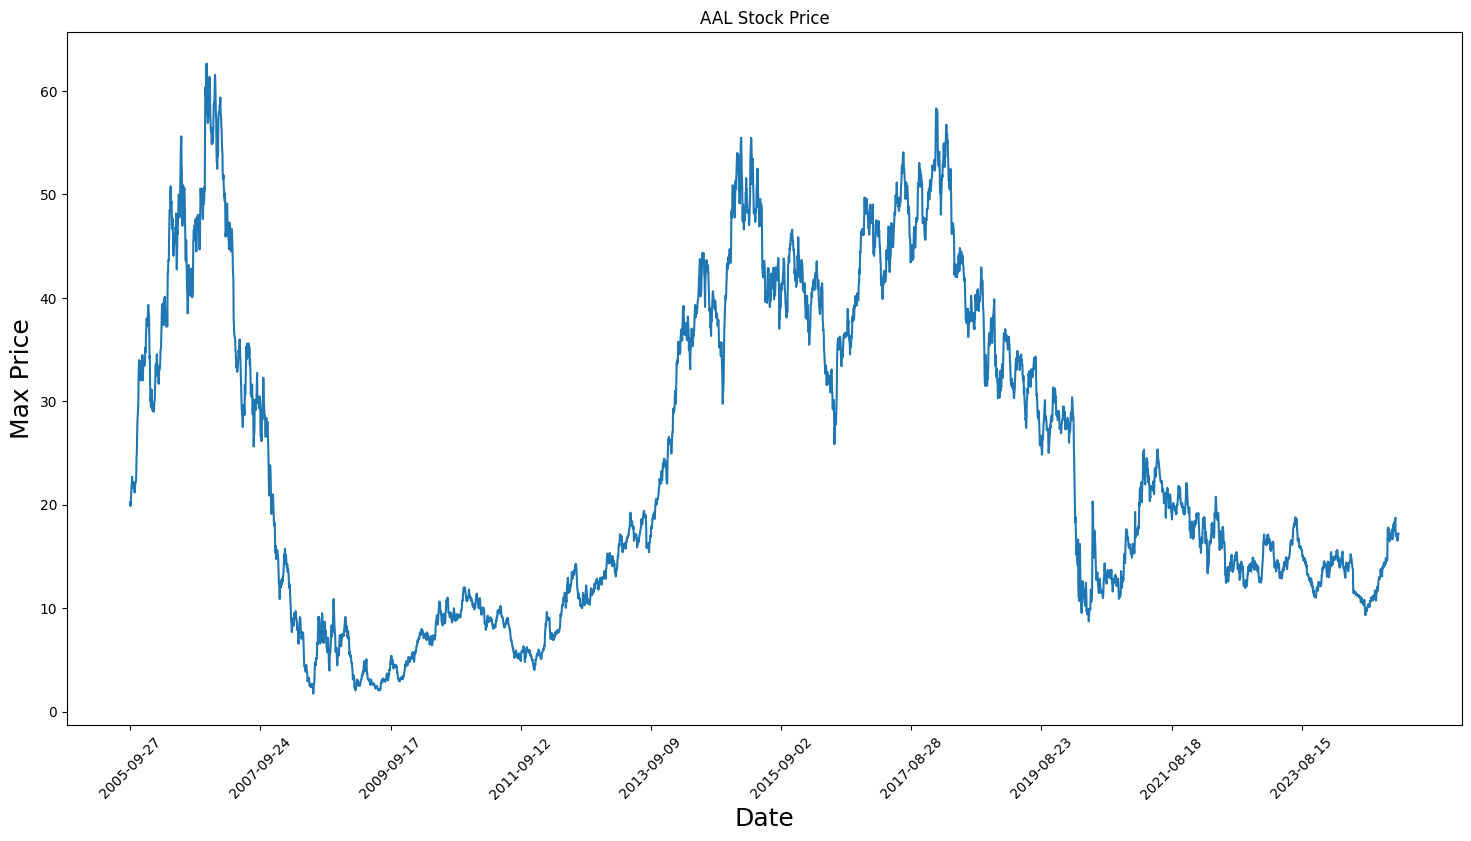

In [ ]:
plt.figure(figsize= (18,9))
plt.plot(range(df.shape[0]),(df['High']+df['Low'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation = 45)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Max Price', fontsize = 18)
plt.title("AAL Stock Price")
plt.show();

In [ ]:
high_price = df.loc[:,'High'].to_numpy()
low_price = df.loc[:,'Low'].to_numpy()
mid_price = (high_price+low_price)/2.0
train_data = mid_price[:len(mid_price)//2]
test_data = mid_price[len(mid_price)//2:]

In [ ]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [ ]:
smoothing_window_size = 2500
i = 0;
for i in range(0,10000,smoothing_window_size) :
  scaler.fit(train_data[i:i+smoothing_window_size,:])
  train_data[i:i+smoothing_window_size,:] = scaler.transform(train_data[i:i+smoothing_window_size,:])
scaler.fit(train_data[i+smoothing_window_size:,:])
train_data[i+smoothing_window_size:,:] = scaler.transform(train_data[i+smoothing_window_size:,:])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.